In [3]:
# 11-10-2025

In [31]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
X_train = pd.read_csv("../normalized split data/X_train.csv")
X_test = pd.read_csv("../normalized split data/X_test.csv")
y_train = pd.read_csv("../normalized split data/y_train.csv")
y_test = pd.read_csv("../normalized split data/y_test.csv")

In [34]:
xgb_model = XGBRegressor(
    n_estimators=5000,      # number of boosting rounds (trees)
    learning_rate=0.001,
    max_depth=6,           # maximum depth of each tree
    subsample=0.8,         # fraction of samples used per tree
    colsample_bytree=0.8,  # fraction of features used per tree
    random_state=5    
)

In [35]:
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [36]:
def return_metrics(X,y,subset_name):

    xgb_y_pred = xgb_model.predict(X)

    xgb_mae = mean_absolute_error(y, xgb_y_pred)
    xgb_mse = mean_squared_error(y, xgb_y_pred)

    print(f"{subset_name} MAE: {xgb_mae:.3f}")
    print(f"{subset_name} MSE: {xgb_mse:.3f}")
    
    sns.histplot(data=xgb_y_pred, bins=30, kde=False, color="red", alpha=0.5)
    sns.histplot(data=y, bins=30, kde=False, color="blue", alpha=0.5)

    plt.title(f"blue: actual values, red: predicted values, {subset_name}")
    plt.xlabel("fire size")



train MAE: 0.483
train MSE: 0.389


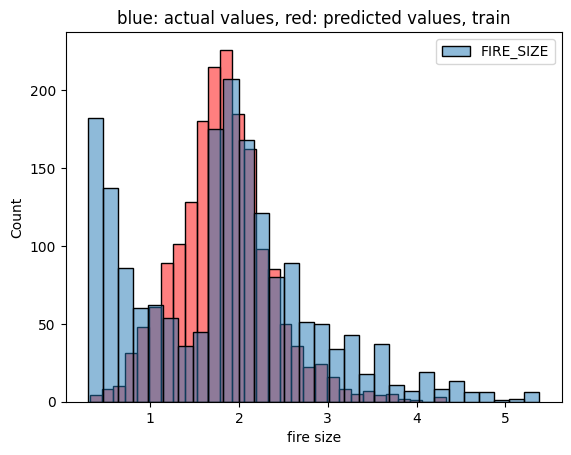

In [37]:
return_metrics(X_train,y_train,"train")

test MAE: 0.717
test MSE: 0.834


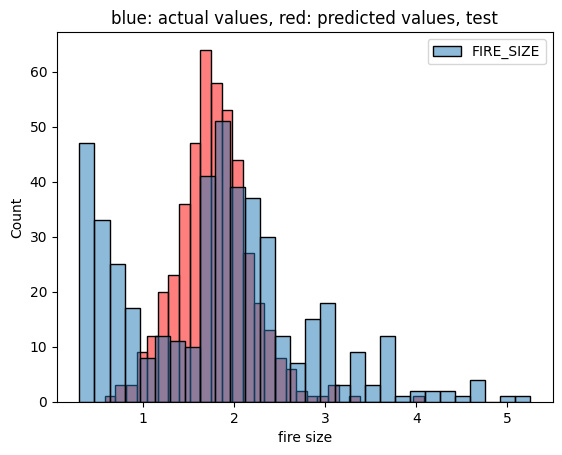

In [38]:
return_metrics(X_test,y_test,"test")

In [39]:
y_test.describe()

,FIRE_SIZE
count,454.000000
mean,1.797030
std,1.017038
min,0.301030
25%,0.882068
50%,1.848178
75%,2.330312
max,5.251930


In [40]:
y_train.describe()

,FIRE_SIZE
count,1814.000000
mean,1.823494
std,1.027105
min,0.301030
25%,0.905771
50%,1.875061
75%,2.387087
max,5.380586


In [41]:
# use something like X[(y condition)].copy()
# the (y condition) represrnts a mask (ex: y>3), which creates a series of true/false for each index, which can be applied to X

In [42]:
X_full = pd.concat([X_train, X_test], axis=0, ignore_index=True) # axis 0 means to stack df's (by rows)
y_full = pd.concat([y_train, y_test], axis=0, ignore_index=True)

In [43]:
X_full.describe()

,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
count,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000
mean,-0.001878,0.014611,0.009323,-0.003611,-0.005631,0.000334,-0.016701
std,1.002660,1.003417,1.013880,1.020344,1.007307,1.001213,0.989184
min,-3.033133,-2.940956,-0.306948,-2.539688,-5.337445,-1.306848,-1.704238
25%,-0.628710,-0.697788,-0.306948,-0.666254,-0.740671,-1.024241,-0.724820
50%,0.068493,0.049935,-0.306948,-0.194763,-0.128298,0.004481,-0.174557
75%,0.694189,0.851066,-0.306948,0.497546,0.733751,0.806261,0.569949
max,3.025646,1.812424,3.835414,2.708766,2.730556,1.916877,4.260262


In [44]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp_max_F     2268 non-null   float64
 1   humidity_pct   2268 non-null   float64
 2   precip_in      2268 non-null   float64
 3   windspeed_mph  2268 non-null   float64
 4   ndvi           2268 non-null   float64
 5   pop_density    2268 non-null   float64
 6   slope          2268 non-null   float64
dtypes: float64(7)
memory usage: 124.2 KB


In [45]:
y_full = y_full.squeeze()

In [46]:
y_full

0       0.301030
1       1.918197
2       2.712774
3       0.477121
4       0.477121
          ...   
2263    0.698970
2264    0.845098
2265    2.477121
2266    2.477121
2267    1.778151
Name: FIRE_SIZE, Length: 2268, dtype: float64

In [47]:
y_full.describe()

count    2268.000000
mean        1.818196
std         1.024929
min         0.301030
25%         0.903090
50%         1.875061
75%         2.362199
max         5.380586
Name: FIRE_SIZE, dtype: float64

full MAE: 0.530
full MSE: 0.478


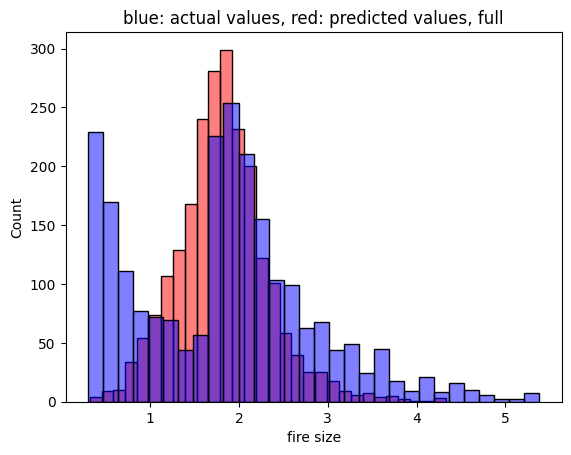

In [48]:
return_metrics(X_full,y_full,"full")

upper 75% MAE: 0.809
upper 75% MSE: 0.905


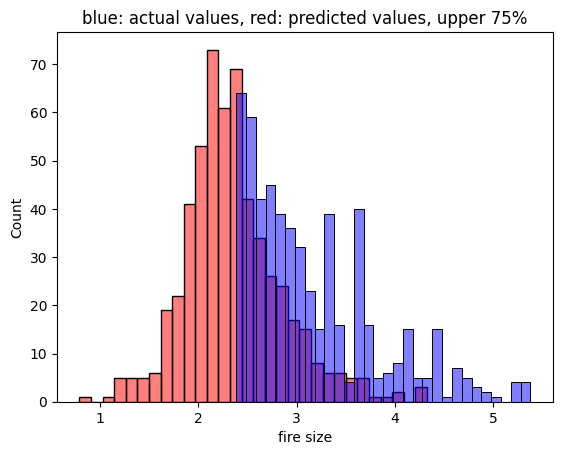

In [49]:
condition = y_full>2.38
return_metrics(X_full[condition],y_full[condition],"upper 75%")

middle 50% MAE: 0.262
middle 50% MSE: 0.117


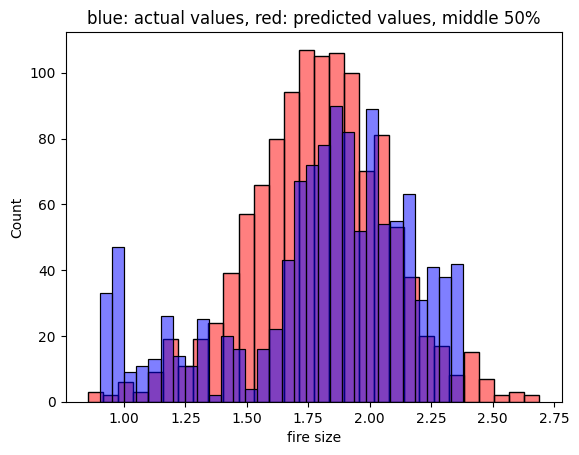

In [50]:
condition = (y_full>0.9) & (y_full<2.38) 
return_metrics(X_full[condition],y_full[condition],"middle 50%")
# NEED to use bitwise logical and (&) instead of "and" because "and" cannot compare Series

bottom 25% MAE: 0.819
bottom 25% MSE: 0.815


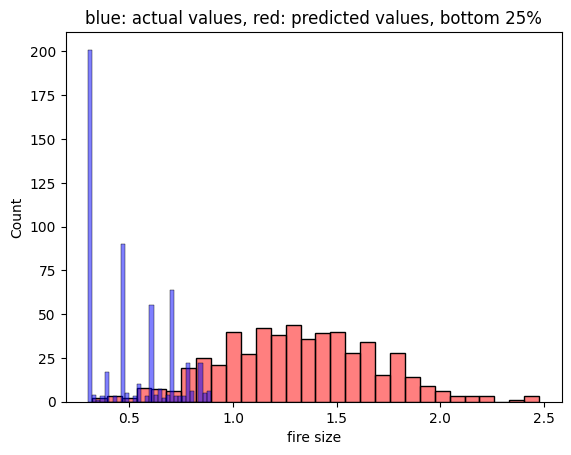

In [51]:
condition = y_full < 0.9
return_metrics(X_full[condition],y_full[condition],"bottom 25%")

In [52]:
# the reason some of the bars are thinner is because the blue values (actual) are forced to range between 0 and 0.9,
# while the model outputs are not constrained to those limits
# its actually not an error that the bars look so weird, it means its working

above 3 MAE: 1.092
above 3 MSE: 1.446


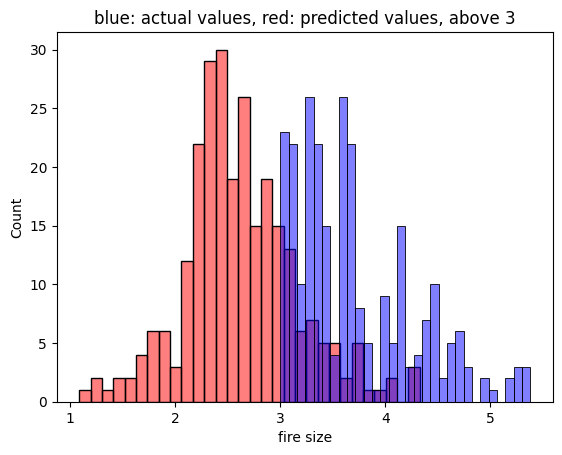

In [53]:
condition = y_full > 3
return_metrics(X_full[condition],y_full[condition],"above 3")

below 0.5 MAE: 0.909
below 0.5 MSE: 0.980


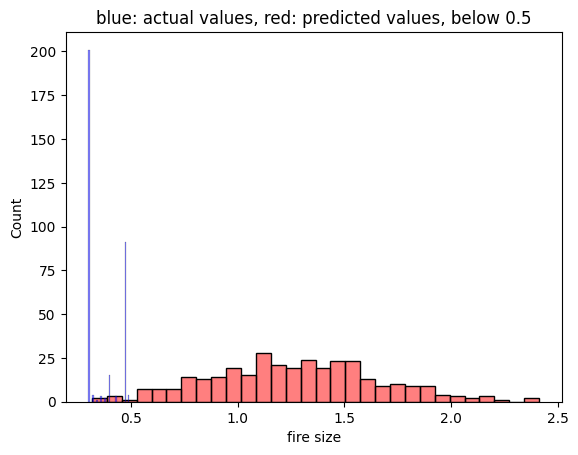

In [54]:
condition = y_full < 0.5
return_metrics(X_full[condition],y_full[condition],"below 0.5")

In [55]:
X_full.describe()

,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
count,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000
mean,-0.001878,0.014611,0.009323,-0.003611,-0.005631,0.000334,-0.016701
std,1.002660,1.003417,1.013880,1.020344,1.007307,1.001213,0.989184
min,-3.033133,-2.940956,-0.306948,-2.539688,-5.337445,-1.306848,-1.704238
25%,-0.628710,-0.697788,-0.306948,-0.666254,-0.740671,-1.024241,-0.724820
50%,0.068493,0.049935,-0.306948,-0.194763,-0.128298,0.004481,-0.174557
75%,0.694189,0.851066,-0.306948,0.497546,0.733751,0.806261,0.569949
max,3.025646,1.812424,3.835414,2.708766,2.730556,1.916877,4.260262
